In [1]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Importando las librerías

Se implementa la regresión logística con Pipeline

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## 2. Leyendo los datos

In [3]:
dataset = pd.read_csv('..\..\datos_procesados\datos_procesados.csv')
dataset.drop(columns=['Unnamed: 0'], inplace=True)
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69971,19240,2,168,76.0,120,80,1,1,1,0,1,0
69972,22601,1,158,126.0,140,90,2,2,0,0,1,1
69973,19066,2,183,105.0,180,90,3,1,0,1,0,1
69974,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 3. Separando los datos en las variables predictoras (**X**) y la variable a predecir (y)

In [4]:
X = dataset.drop(columns=['cardio'], axis=1)
y = dataset['cardio']

## 4. Separando los datos en train y test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 5. Creando el pipeline

In [6]:
#Creando los pasos del pipeline
pasos = [
    ('esc_rob', RobustScaler()),
    ('pca', PCA()),
    ('rl', LogisticRegression())
]

#Se crea el pipeline
pipeline = Pipeline(steps=pasos)

#Entrenando el pipeline con los datos de entrenamiento
pipeline.fit(X=X_train, y=y_train)

Pipeline(steps=[('esc_rob', RobustScaler()), ('pca', PCA()),
                ('rl', LogisticRegression())])

#### 5.1 Evaluando las predicciones del modelo con los datos de entrenamiento

Presición del modelo con los datos entrenamiento: 71.90 %


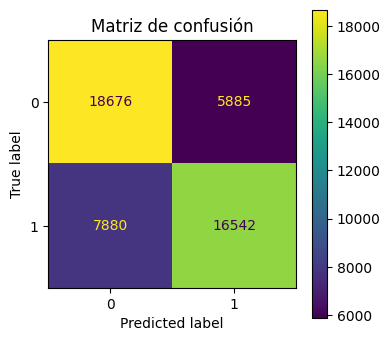

In [7]:
y_pred = pipeline.predict(X=X_train)
print('Presición del modelo con los datos entrenamiento: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 5.2 Evaluando las predicciones del modelo con los datos de test

Presición del modelo con los datos de prueba: 71.35 %


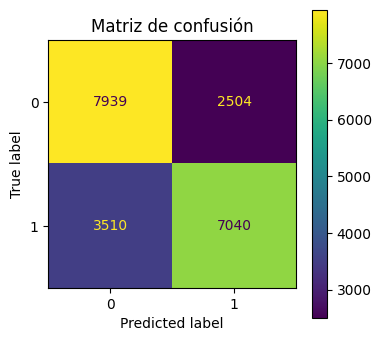

In [8]:
y_pred = pipeline.predict(X=X_test)
print('Presición del modelo con los datos de prueba: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

## 6. Optimización paramétrica

In [9]:
#Creando la grilla de parámetros
parametros1 = {
    'pca':[PCA(1), PCA(2), PCA(3), PCA(4),PCA(5),PCA(6), PCA(12)],
    'rl__penalty':('l1','l2','elasticnet'),
    'rl__C':(2,1.5,1,0.1,0.01,0.001,0.0001,0.00001)
}

#Se crea el optimizador
grid_search = GridSearchCV(
    estimator=pipeline, 
    param_grid=parametros1,
    cv=5,
    scoring='accuracy'
)

#Entrando el modelo por optimización
grid_search.fit(X=X_train, y=y_train)

grid_search.best_estimator_

Pipeline(steps=[('esc_rob', RobustScaler()), ('pca', PCA(n_components=4)),
                ('rl', LogisticRegression(C=2))])

#### 6.1 Evaluando las predicciones del nuevo modelo con los datos de entrenamiento

Presición del modelo: 71.82 %


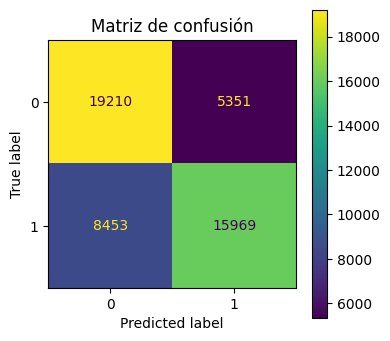

In [10]:
y_pred = grid_search.predict(X=X_train)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_train, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_train, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()

#### 6.2  Evaluando las predicciones del nuevo modelo con los datos de prueba

Presición del modelo: 71.70 %


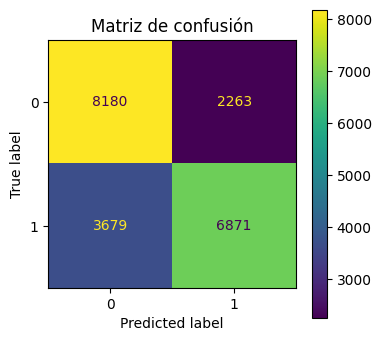

In [11]:
y_pred = grid_search.predict(X=X_test)
print('Presición del modelo: {:.2f} %'.format(accuracy_score(y_true=y_test, y_pred=y_pred)*100))

matrix_conf = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(4,4), dpi=100)
display = ConfusionMatrixDisplay(matrix_conf)
ax.set(title='Matriz de confusión')
display.plot(ax=ax)
plt.show()